In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Iris Dataset**

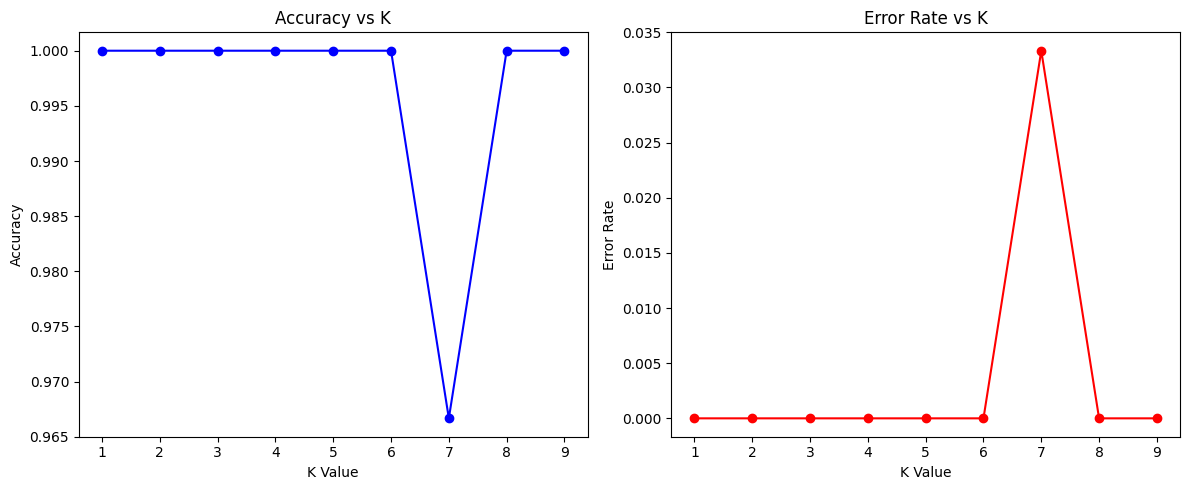

Best K: 1 with Accuracy: 1.00


In [31]:
iris_df = pd.read_csv('iris.csv')

le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['species'])

X = iris_df.drop('species', axis=1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

error_rates = []
accuracies = []
k_values = range(1, 10)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred_k)
    error_rates.append(error)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title("Accuracy vs K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(k_values, error_rates, marker='o', color='red')
plt.title("Error Rate vs K")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

plt.tight_layout()
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K: {best_k} with Accuracy: {max(accuracies):.2f}")


=== Final Evaluation on IRIS Dataset ===
Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



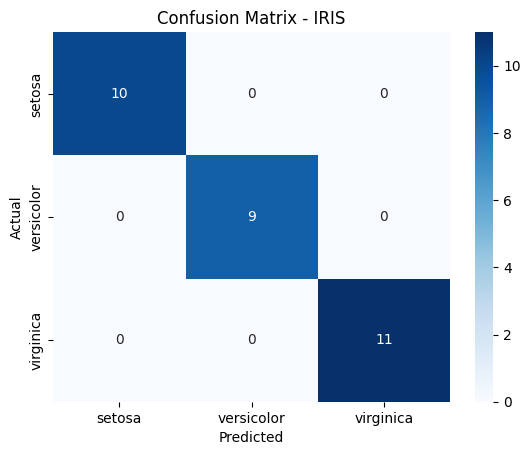

In [32]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
print("\n=== Final Evaluation on IRIS Dataset ===")
print("Accuracy Score:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - IRIS")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **2. Diabetes Dataset**

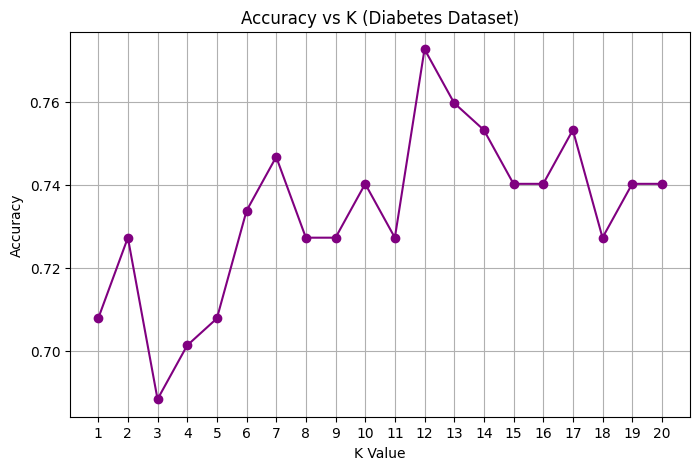

Best K: 12 with Accuracy: 0.77


In [42]:
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracy_scores, marker='o', color='purple')
plt.title("Accuracy vs K (Diabetes Dataset)")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid()
plt.show()

best_k = k_range[accuracy_scores.index(max(accuracy_scores))]
print(f"Best K: {best_k} with Accuracy: {max(accuracy_scores):.2f}")

=== Final Evaluation (Diabetes Dataset) ===
Accuracy Score: 0.7727272727272727

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.73      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



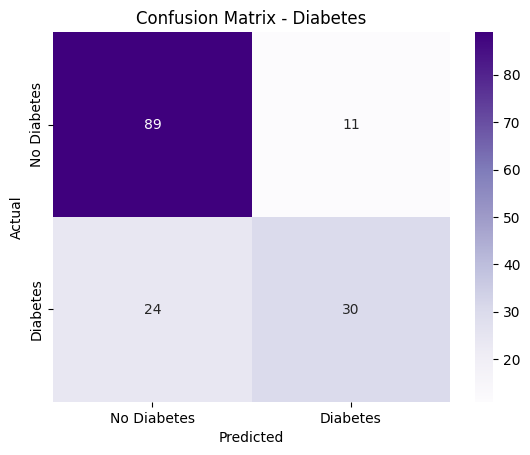

In [43]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== Final Evaluation (Diabetes Dataset) ===")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix - Diabetes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **3. Heart Dataset**

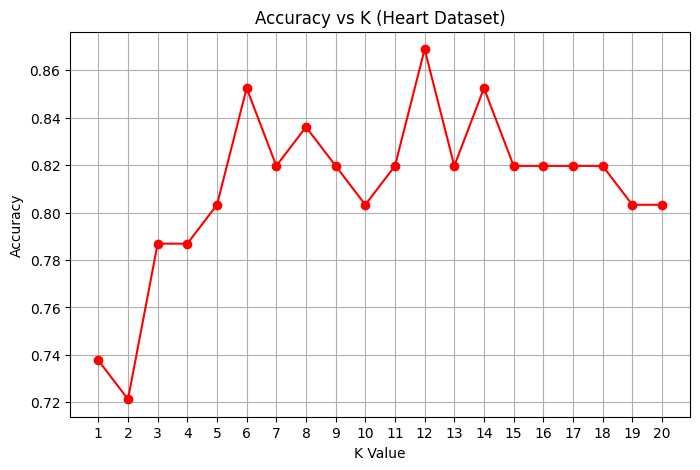

Best K: 12 with Accuracy: 0.87


In [40]:
heart_df = pd.read_csv('heart.csv')

X = heart_df.drop('target', axis=1)
y = heart_df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracy_scores, marker='o', color='red')
plt.title("Accuracy vs K (Heart Dataset)")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid()
plt.show()

best_k = k_range[accuracy_scores.index(max(accuracy_scores))]
print(f"Best K: {best_k} with Accuracy: {max(accuracy_scores):.2f}")

=== Final Evaluation (Heart Dataset) ===

Accuracy Score: 0.8688524590163934

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.92      0.79      0.85        28
     Disease       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



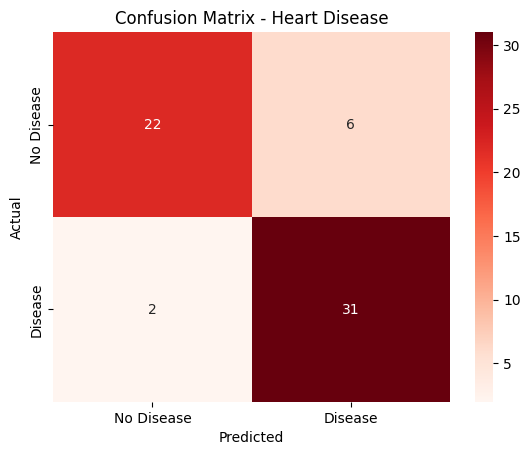

In [41]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("=== Final Evaluation (Heart Dataset) ===")
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix - Heart Disease")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()